# Lab 4: Markov chain Monte Carlo

## Tien Le (Tyler)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## a trivial case of inversion

This is a demonstration for MCMC, so we use a rather trivial case for inverting multiple variables that are independently distributed

#### the cookie problem

Let's say we are given a hundreds of boxes, each box has unknown numbers of cookies inside. We are inverting for number of cookies in each box.

Judge by the size of the box, you decide that each box at most has 100 cookies. Chef also gives us a function called 'diff'. This function returns the sum of the squared differences between the input value and the true number of cookies.

$diff(values) = \sum_i^{100}(values[i] - trueValues[i] + noise)^2$

please do not open the difference.py to directly read the code!

In [2]:
from difference import diff 

lets guess a random number of cookies in every box

In [3]:
num_box = 100

In [4]:
my_guess = np.random.randint(0,100,100)
my_guess

array([66, 42, 26, 66, 93, 49, 11, 16, 69,  6, 84, 24, 13, 44, 93, 63, 54,
       33, 52, 84, 98, 24, 95, 26, 92, 53, 15, 39, 30, 77, 95, 47,  1, 77,
       41, 32, 41, 22, 51, 41, 95, 56, 94,  9, 60, 38, 27, 44, 20, 49, 46,
       56, 21, 56, 33, 41, 63, 80, 42, 17, 66, 31, 80,  2, 20, 71, 62, 49,
       10, 79, 41, 86, 41, 37, 38, 49, 70, 79,  8, 61, 95, 30, 95, 99, 21,
       12, 53, 41, 90, 87, 13, 34, 20,  9, 88, 55, 75, 34, 54, 11])

In [5]:
diff(my_guess)

208277.8696282907

In [6]:
my_guess2 = np.random.randint(0,100,100)
my_guess2

array([45,  5, 68, 69, 79,  7, 66, 84, 26, 75, 99, 27, 80, 61, 74, 46, 21,
       38, 99, 54, 46, 84,  0, 23, 23, 14, 51, 68, 77, 91, 20, 10, 80, 49,
       57, 57,  6,  3, 50, 21, 24, 59, 37, 69, 51, 22, 21, 39, 75,  1, 24,
       81,  5, 41, 43, 35, 35, 67, 31, 63, 31, 20, 66, 80,  0, 40, 29,  5,
       57, 42, 67, 19,  2, 22, 17, 26,  1, 94, 33, 86, 11, 45, 65, 77, 18,
       90, 45, 92, 97, 64, 35,  9, 60, 30, 62, 24, 50, 30, 40, 95])

In [7]:
diff(my_guess2)

186018.3365801134

__Q1: Is my_guess2 better or my_guess better?__

Answer:

Lets denote a guess on the number of cookies in each box as $x$, $x$ is an array of 100 random variables ($x_i$, $i \in 0,1,2,...100$).

Different guesses give back different $diff(guess)$. You know that your guess is true when the diff returns only the noise. You also know that the noise follow __a Gaussian distribution with standard deviation of 2.5 and a mean of 0__. 

In other words, for each box, $misfit = guess - trueValues$. misfit (denoted as m) is an array of 100 variables, and each variable suppose to have a Gaussian distribution with standard deviation of 2.5.

misfit (m) has a pdf of the form

for each $m_i \in m$

$\frac{1}{\sigma \sqrt{2 \pi}} e^{-(m_i - \mu)^2 / (2 \sigma^2)}$, where $\sigma = 2.5$, $\mu = 0$

$\frac{1}{\sigma \sqrt{2 \pi}} e^{-m_i^2 / (2 \sigma^2)}$

Let use MCMC to figure out this problem!

#### first iteration

we first make a random guess that every box have 50 cookies

In [8]:
initial_values = np.array([50]*num_box)
initial_loss = diff(initial_values)
initial_loss

142623.76783518307

In [9]:
sigma = 2.5

In [10]:
current_values = initial_values

 ------------------------ Below is one iterations of MCMC algorithm -------------------------
 
In every iteration, we first perturb the current guess we have, and then evaluate the updated values (a.k.a. perturbed values)

In [11]:
perturbation = np.random.uniform(low = -10, high=10, size=num_box)
print(perturbation)

[-4.46034611 -5.84775051 -4.34193426  9.20130442 -1.36386772  4.1794705
  1.90846082 -3.30883977 -3.75630573  9.69781198 -6.24589215  6.4529871
  9.14874966 -5.93003057  6.72485423 -9.06481485 -2.6910448  -7.82598551
  2.96196601  8.37473178  7.68482314  1.67307391  8.37835669  5.06079952
 -3.98953971 -3.93348235  1.1489136  -9.15588433  1.4100256   2.44221265
 -2.79304194 -7.44770859 -3.06625547  6.32494642  8.32939356  2.74959088
  7.19324665 -7.49323535 -7.31608976 -3.9920122  -3.85550246  4.19998034
  7.15398852  7.00436815  8.55007976 -7.25950527  5.3528136  -0.30478415
 -3.44755725 -2.72358387 -2.10653766 -8.91042438  5.52083739  3.53000295
  3.40746472  3.69750835  9.61040097  8.59145823 -3.66935214  8.80317786
  9.19644066 -3.90029094  4.7208367  -3.9807762   1.65078691 -0.86260166
 -3.45409276  8.10324707 -4.11950552 -7.0460983  -9.01184683  4.96242641
  9.15931842 -1.5412147  -4.92606929 -2.27761916 -6.37381478  9.44426868
 -9.03990734 -9.24195962  4.29857165  8.97271232  5.4

In [12]:
updated_values = current_values + perturbation

Text(0, 0.5, 'number of cookies')

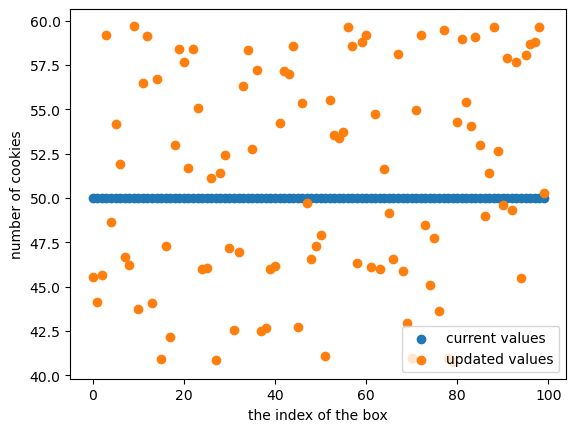

In [13]:
x = np.arange(0,num_box,1)
plt.scatter(x,current_values,label='current values')
plt.scatter(x,updated_values,label='updated values')
plt.legend()
plt.xlabel('the index of the box')
plt.ylabel('number of cookies')

In [14]:
current_loss = diff(current_values)
updated_loss = diff(updated_values)
current_loss, updated_loss

(146594.7262898636, 155646.24980657824)

Then we decide whether to accept the updated values or the current values using MCMC criteria

$\alpha(x \to x')$ is the probability of accepting $x'$ which is generated by updating $x$

$\alpha(x \to x') = \min\!\left(1, \; \frac{\pi(x') \, q(x \mid x')}{\pi(x)\, q(x' \mid x)} \right)$

Know that because we use uniform perturbation, $q(x \mid x') = q(x' \mid x)$

$\alpha(x \to x') = \min\!\left(1, \; \frac{\pi(x')}{\pi(x)} \right)$

For $x_i \in x$, $x_i$ has the probability density function based on the misfit $m_i$:

$\frac{1}{\sigma \sqrt{2 \pi}} e^{-m_i^2 / (2 \sigma^2)}$

Thus the joint probability distribution of $x_0, x_1, x_2, ..., x_n$ is $\frac{1}{\sigma \sqrt{2 \pi}} e^{- \sum_{i=0}^n{m_i^2} / (2 \sigma^2)}$

$\alpha(x \to x') = \min\!\left(1, \; \frac{\frac{1}{\sigma \sqrt{2 \pi}} e^{- \sum_{i=0}^n{m_i'^2} / (2 \sigma^2)}}{\frac{1}{\sigma \sqrt{2 \pi}} e^{- \sum_{i=0}^n{m_i^2} / (2 \sigma^2)}} \right)$

After simplification, $\alpha(x \to x') = \exp\!\left( \frac{\sum_{i=0}^n{m_i^2} - \sum_{i=0}^n{m_i'^2}}{2\sigma^2} \right)$


Knows that the diff returns sum of squared misfits, the acceptance rate becomes

$\alpha(x \to x') = \exp\!\left( \frac{diff(x) - diff(x')}{2\sigma^2} \right)$

In [15]:
if current_loss > updated_loss:
    acceptance_probability = 1
else:
    acceptance_probability = min(1,np.exp((current_loss-updated_loss)/(2*sigma**2)))

In [16]:
acceptance_probability

3.295055317e-315

In [17]:
u = np.random.rand()
if (u <= acceptance_probability): # if we accept the updated values, then we update the current values and loss
    current_values = updated_values
    current_loss = updated_loss

--------------------end of the first iteration-------------------------

#### second iteration

lets do another iteration for demonstration

In [18]:
# update/perturb the current values
perturbation = np.random.uniform(low = -10, high=10, size=num_box)
updated_values = current_values + perturbation

# evaluate the updated values
current_loss = diff(current_values)
updated_loss = diff(updated_values)
print(current_loss, updated_loss)

# decide which one to accept
if current_loss > updated_loss:
    acceptance_probability = 1
else:
    acceptance_probability = min(1,np.exp((current_loss-updated_loss)/(2*sigma**2)))
print(acceptance_probability)

u = np.random.rand()
if (u <= acceptance_probability): # if we accept the updated values, then we update the current values and loss
    print('accepted')
    current_values = updated_values
    current_loss = updated_loss
else:
    print('not accepted')

143665.43000072648 156243.60855641201
0.0
not accepted


#### use a python function to run all iterations

sum up every we learned into a function

In [19]:
num_iters = 100000 # determine how many iteration in MCMC you want to go through 
step_size = 5 # determine the magnitude of the perturbation
num_box = 100

In [20]:
initial_values = np.array([50]*num_box)

In [21]:
from difference import diff 

In [22]:
def mcmc_cookie(num_iters, num_box, initial_values, step_size):

    results = np.zeros((num_iters,num_box))
    loss = np.zeros(num_iters)
    steps = np.zeros(num_iters)
    
    current_values = initial_values
    current_loss = diff(current_values)
    
    for i in range(num_iters):
        perturbation = np.random.uniform(low = -1*step_size, high=step_size, size=num_box)
        updated_values = current_values.copy() + perturbation

        updated_loss = diff(updated_values)
    
        if current_loss > updated_loss:
            acceptance_probability = 1
        else:
            acceptance_probability = min(1,np.exp((current_loss-updated_loss)/(2*sigma**2)))
    
        u = np.random.rand()
        if (u <= acceptance_probability):
            current_values = updated_values
            current_loss = updated_loss
            steps[i] = 1
        else:
            steps[i] = 0
    
        results[i,:] = current_values
        loss[i] = current_loss

    return results, loss, steps

In [23]:
results, loss, steps = mcmc_cookie(num_iters, num_box, initial_values, step_size)

Text(0, 0.5, 'number of cookies')

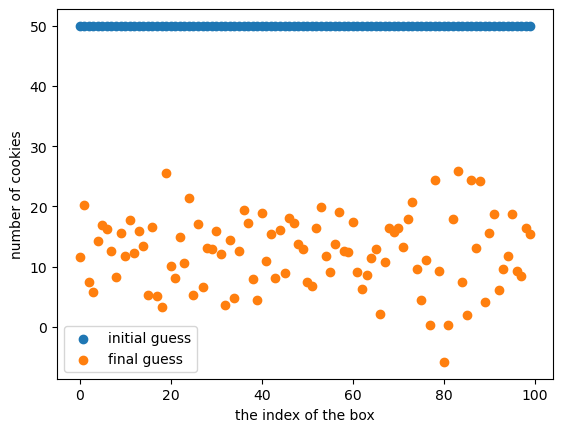

In [24]:
x = np.arange(0,100,1)
plt.scatter(x,initial_values,label='initial guess')
plt.scatter(x,results[-1],label='final guess')
plt.legend()
plt.xlabel('the index of the box')
plt.ylabel('number of cookies')

In [25]:
## it might be helpful to plots some intermediate results. What are your guesses in iteration 1, 2, 3,... 300, 600, ... looks like?

__Q2: read the function mcmc_cookie(), then answer the following questions__

(1) What is the output of the function, what 'result', 'loss', 'steps' record, respectively?

(2) plot the loss over all the iterations, 

(3) calculate how many iterations accepted the update and how many iterations didn't accept the update, calculate acceptance rate = number of accepted iterations / number of total iterations

(3) What you think of the results? Do you think you know roughly how many cookies is in each box? 

(4) Change the number of iterations. At what number of iterations you are confident in your guess of the numbers of cookies?

#### Upgrading the algorithm

Now we have to predict for 1000 cookie boxes! The new diff function is in difference1000.py. 

In [26]:
from difference1000 import diff1000

Because the large amount of boxes, sometimes we could encounter an issue where the preferred perturbation for some of the boxes is countered by unfavorable pertubations for other boxes. Instead of perturbing the guess for every box, we only perturb a number of box (block_size) at each iteration. This 'block update' scheme helps to increase the acceptance rate of the algorithm, especially when there are many variables to invert for.

Some references for block update:

https://www2.stat.duke.edu/courses/Fall21/sta601.001/slides/10-gibbs-handout.pdf

https://doi.org/10.1007/s11004-008-9206-0

In [27]:
block_size = 20

#calculate for the block perturbation
block_start = np.random.randint(0, num_box - block_size)
block_end = block_start + block_size

print(block_start, block_end)

66 86


In [28]:
step_size = 10

perturbation = np.random.uniform(low = -1*step_size, high=step_size, size=block_size)

print(perturbation)

[ 3.56613913  1.17795391 -3.54808222 -0.70202296  1.83290541  0.49942482
 -0.20613174 -7.73607769  4.66558485 -2.97332952  9.36500198  1.34839317
 -0.40613174 -2.1201888   1.51309314  8.80719731 -1.23392453  6.48210639
  2.55006308  8.14461733]


In [29]:
current_values = np.array([50]*num_box)
updated_values = current_values.copy()
updated_values[block_start:block_end] = updated_values[block_start:block_end] + perturbation

Text(0, 0.5, 'number of cookies')

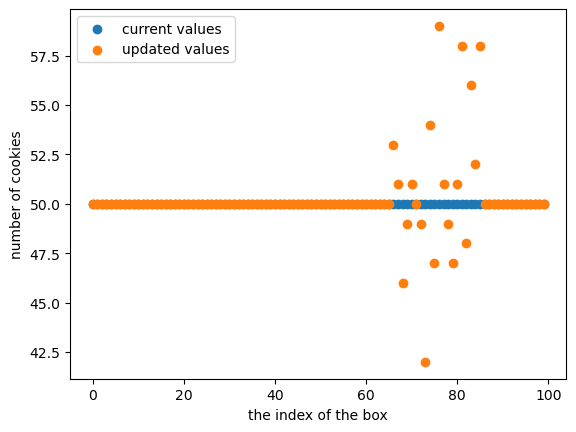

In [30]:
x = np.arange(0,num_box,1)
plt.scatter(x,current_values,label='current values')
plt.scatter(x,updated_values,label='updated values')
plt.legend()
plt.xlabel('the index of the box')
plt.ylabel('number of cookies')

In [31]:
def mcmc_cookie_block(num_iters, num_box, initial_values, step_size, block_size):

    results = np.zeros((num_iters,num_box))
    loss = np.zeros(num_iters)
    steps = np.zeros(num_iters)
    
    current_values = initial_values
    current_loss = diff(current_values)
    
    for i in range(num_iters):

        #calculate for the block perturbation
        block_start = np.random.randint(0, num_box - block_size)
        block_end = block_start + block_size
        
        perturbation = np.random.uniform(low = -1*step_size, high=step_size, size=block_size)
        updated_values = current_values.copy()
        updated_values[block_start:block_end] = updated_values[block_start:block_end] + perturbation

        updated_loss = diff1000(updated_values)
    
        if current_loss > updated_loss:
            acceptance_probability = 1
        else:
            acceptance_probability = min(1,np.exp((current_loss-updated_loss)/(2*sigma**2)))
    
        u = np.random.rand()
        if (u <= acceptance_probability):
            current_values = updated_values
            current_loss = updated_loss
            steps[i] = 1
        else:
            steps[i] = 0
    
        results[i,:] = current_values
        loss[i] = current_loss

    return results, loss, steps

Define num_iters, num_box, initial_values, step_size, block_size. Then use mcmc_cookie_block to figure out how many cookies are in each box


__Q3 Answer following questions:__

(1) Plot the initial guess and the final result and calculate acceptance rate, as in Q2 (1) (2)

(2) Change step size and change number of iterations. Which step size and number of iterations produce a good result? Hint: the mean number of cookies in each box is 70

(2) Change block size. Which block size produce a good result with less iterations?

## Extra material: Use MCMC on a 1D glacier (Optional)

#### Create a synthetic 1D glacier

In [32]:
number_grid_cells = 100
resolution = 1000

# create true surface, bed, and velocity
surface = np.linspace(1200,1000,number_grid_cells)
bed = surface - 800 + np.random.rand(number_grid_cells)*100
velocity = np.zeros(number_grid_cells)
velocity[0] = 50
for i in range(1,number_grid_cells):
    velocity[i] = velocity[i-1] * (surface[i-1] - bed[i-1]) / (surface[i] - bed[i])

Text(0, 0.5, 'elevation (m)')

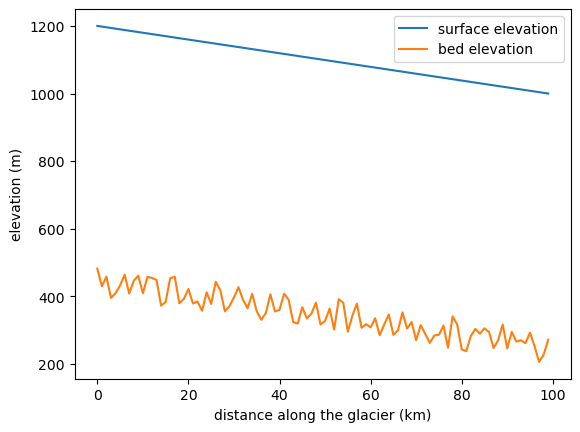

In [33]:
plt.plot(surface,label='surface elevation')
plt.plot(bed,label='bed elevation')
plt.legend()
plt.xlabel('distance along the glacier (km)')
plt.ylabel('elevation (m)')

Text(0, 0.5, 'velocity (meters per year)')

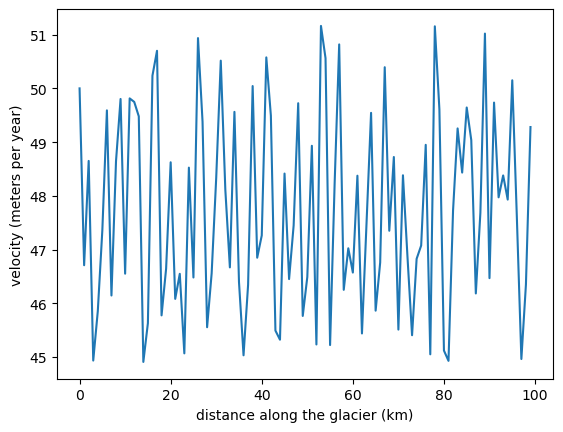

In [34]:
plt.plot(velocity)
plt.xlabel('distance along the glacier (km)')
plt.ylabel('velocity (meters per year)')

In [35]:
# assume Ms = 0, Mb = 0, dHdt = 0
# this is function to calculate mass flux residuals for 1D glacier
def get_mass_flux_residual_1d(bed, surf, vel, resolution):
    thick = surf - bed  
    dx = np.gradient(vel*thick, resolution)
    
    return dx

In [36]:
# test to ensure that the velocity, bed elevation, and surface elevation generated this way has zero mass flux residuals
get_mass_flux_residual_1d(bed,surface,velocity,resolution)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
# this is the original mass flux residual function in 2D
# for reference
def get_mass_flux_residual(bed, surf, velx, vely, dhdt, smb, resolution):
    thick = surf - bed
    
    dx = np.gradient(velx*thick, resolution, axis=1)
    dy = np.gradient(vely*thick, resolution, axis=0)
    
    res = dx + dy + dhdt - smb
    
    return res

#### Select random true bed elevation as radar measurements

In [38]:
num_measurements = 10 # number of measurements
measurements_index = np.sort(np.random.randint(1,100,10))
measurements_locations = measurements_index * resolution
measurements = bed[measurements_index]

In [39]:
measurements_locations, measurements

(array([16000, 32000, 39000, 55000, 67000, 72000, 73000, 78000, 87000,
        94000]),
 array([453.31049735, 389.49732815, 355.19423427, 295.33805823,
        352.50256039, 288.63887317, 262.16889832, 340.87721771,
        247.18968093, 261.36749462]))

#### Get a loss function

In [40]:
def loss_glacier(residuals, sigma):
    return np.sum(np.square(residuals)) / (2 * sigma**2)

#### Use perturbation that account for measurements

In this example, we didn't calculate for spatial correlation of the glacier bed. The perturbation also resemble white noise. But we use $weight$ to ensure that the perturbation is 0 at the location with measurements.

In [41]:
coords = np.arange(0,number_grid_cells,1)*resolution

In [42]:
# calculate the distance of every location to its cloest measurements
min_dist = np.array([np.min(np.abs(coords[i]-measurements_locations)) for i in range(number_grid_cells)])

# use a simple scheme to make sure the perturbation has a relatively smoother change near the measurements
weight = np.full(min_dist.shape, 1.0)
weight[min_dist == 3 * resolution] = 0.8
weight[min_dist == 2 * resolution] = 0.5
weight[min_dist == 1 * resolution] = 0.2
weight[min_dist == 0] = 0

In [43]:
step_size = 5
perturbation = np.random.uniform(low = -1*step_size, high=step_size, size=number_grid_cells)
perturbation = perturbation * weight

Text(0, 0.5, 'perturbation (meters)')

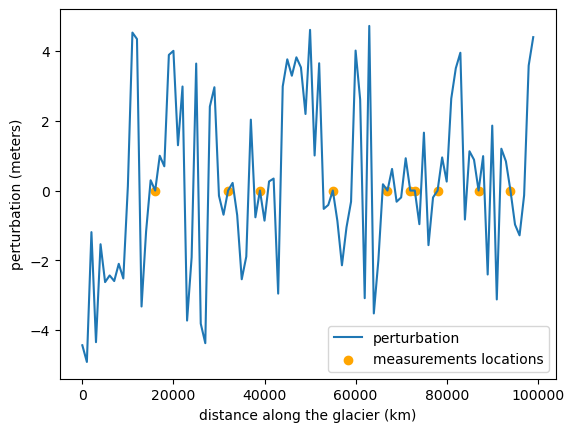

In [44]:
# make sure that the perturbation will have 0 values at measurements locations
plt.plot(coords, perturbation, label='perturbation')
plt.scatter(measurements_locations, [0]*measurements_locations.shape[0],color='orange', label='measurements locations')
plt.legend()
plt.xlabel('distance along the glacier (km)')
plt.ylabel('perturbation (meters)')

#### run MCMC

In [45]:
sigma = 0.6

In [46]:
num_iters = 500000 # determine how many iteration in MCMC you want to go through 
step_size = 5 # determine the magnitude of the perturbation

In [47]:
initial_values = np.array([0]*number_grid_cells)
initial_values[measurements_index] = measurements

In [48]:
def mcmc_glacier(num_iters, num_box, initial_values, step_size, surf, vel, resolution, sigma, weight):
    
    results = np.zeros((num_iters,num_box))
    loss = np.zeros(num_iters)
    steps = np.zeros(num_iters)
    
    current_values = initial_values
    current_loss = loss_glacier(get_mass_flux_residual_1d(current_values, surf, vel, resolution), sigma)
    number_grid_cells = initial_values.shape[0]
    
    for i in range(num_iters):
        #perturbation = np.random.uniform(low = -1*step_size, high=step_size, size=num_box)
        perturbation = np.random.uniform(low = -1*step_size, high=step_size, size=number_grid_cells)
        perturbation = perturbation * weight
        updated_values = current_values.copy() + perturbation

        updated_loss = loss_glacier(get_mass_flux_residual_1d(updated_values, surf, vel, resolution), sigma)
    
        if current_loss > updated_loss:
            acceptance_probability = 1
        else:
            acceptance_probability = min(1,np.exp((current_loss-updated_loss)))
    
        u = np.random.rand()
        if (u <= acceptance_probability):
            current_values = updated_values
            current_loss = updated_loss
            steps[i] = 1
        else:
            steps[i] = 0
    
        results[i,:] = current_values
        loss[i] = current_loss

    return results, loss, steps

In [49]:
results, loss, steps = mcmc_glacier(num_iters, number_grid_cells, initial_values, step_size, surface, velocity, resolution, sigma, weight)

Text(0, 0.5, 'sum of squared mass flux residuals')

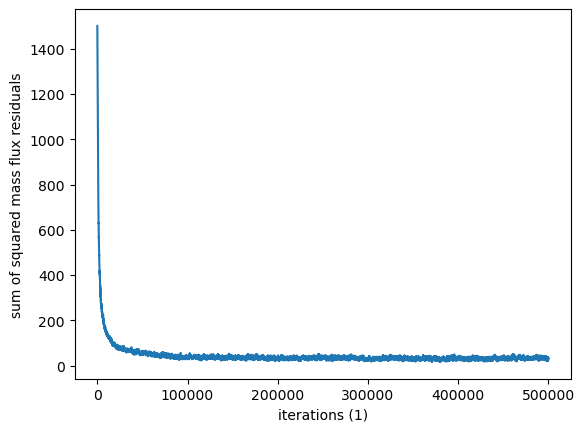

In [50]:
plt.plot(loss * 2 * sigma**2)
plt.xlabel('iterations (1)')
plt.ylabel('sum of squared mass flux residuals')

Text(0, 0.5, 'bed elevation')

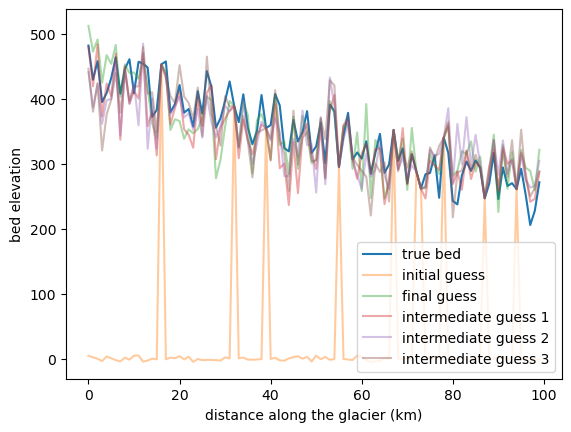

In [51]:
x = np.arange(0,100,1)
plt.plot(bed,label='true bed')
plt.plot(results[0],label='initial guess',alpha=0.4)
plt.plot(results[-1],label='final guess',alpha=0.4)
plt.plot(results[-2000],label='intermediate guess 1',alpha=0.4)
plt.plot(results[-4000],label='intermediate guess 2',alpha=0.4)
plt.plot(results[-6000],label='intermediate guess 3',alpha=0.4)
plt.legend()
plt.xlabel('distance along the glacier (km)')
plt.ylabel('bed elevation')